![Credit Card Fraud Detection](credit.jpg)

***Credit Card Fraud Detection***

Credit card fraud is a growing concern in today's digital age, causing significant financial losses to individuals and businesses. With billions of dollars lost every year, detecting and preventing fraud has become a top priority for banks and financial institutions. However, fraud detection is not just about catching fraudulent transactions—it's about striking the right balance between identifying fraud and ensuring a seamless experience for genuine customers. False positives, where legitimate transactions are incorrectly flagged as fraud, can frustrate customers and damage trust.

This project explores how machine learning can be used to build more effective and accurate systems for detecting credit card fraud. We analyze a dataset of credit card transactions, preprocess the data, detect outliers, and apply advanced machine learning classifiers to distinguish fraudulent transactions from legitimate ones. The models we implement include:

- Logistic Regression  
- Random Forest  
- Gradient Boosting  
- Decision Tree  
- Support Vector Machine (SVM)  

Our goal is to build a fraud detection system that minimizes false positives while accurately identifying fraud. By leveraging machine learning, we aim to enhance security and improve the customer experience.


In [42]:
#import necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#load data
df = pd.read_csv("CreditCardData.csv")


### EDA (Exploratory Data Analysis)

In [44]:
df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [45]:
df.describe

<bound method NDFrame.describe of       Transaction ID       Date Day of Week  Time Type of Card Entry Mode  \
0          #3577 209  14-Oct-20   Wednesday    19         Visa        Tap   
1          #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   
2          #2694 780  14-Oct-20   Wednesday    14         Visa        Tap   
3          #2640 960  13-Oct-20     Tuesday    14         Visa        Tap   
4          #2771 031  13-Oct-20     Tuesday    23         Visa        CVC   
...              ...        ...         ...   ...          ...        ...   
99995      #3203 892  13-Oct-20     Tuesday    22   MasterCard        Tap   
99996      #3304 849  14-Oct-20   Wednesday    23   MasterCard        PIN   
99997      #3532 129  13-Oct-20     Tuesday    11   MasterCard        PIN   
99998      #3107 092  14-Oct-20   Wednesday    22         Visa        Tap   
99999      #3400 711  14-Oct-20   Wednesday    16         Visa        PIN   

      Amount Type of Transaction Merchant

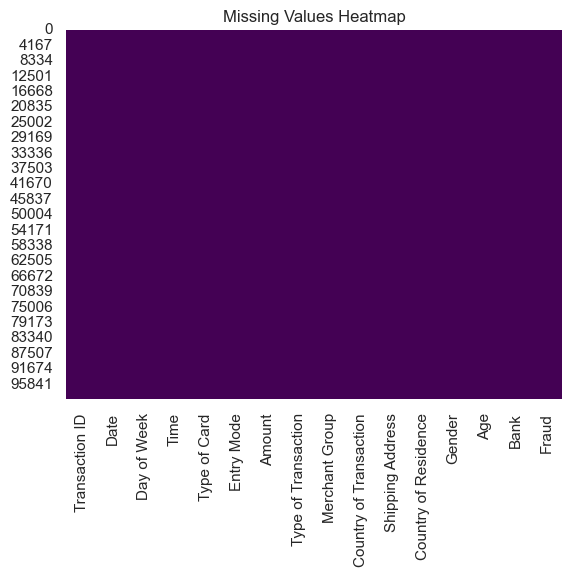

In [46]:
df.isnull().sum()
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Filling Missing Values - There are 6 Missing Values in the amount , which we will replace by Mean.

In [47]:
df['Amount'] = df['Amount'].str.replace('£', '', regex=False).astype(float) # Remove Currency Symbol and covert to numeric
df['Amount'].fillna(df['Amount'].mean(), inplace=True)


C:\Users\cmanc\AppData\Local\Temp\ipykernel_2404\3279589472.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].mean(), inplace=True)


Removing Rows which has NA or missing values. Removing them because these are non-numerical Rows.

Merchant Group - 10

Shipping Address - 5

Gender - 4

In [48]:
df = df.dropna()
df.isnull().sum()

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

In [49]:
df.describe

<bound method NDFrame.describe of       Transaction ID       Date Day of Week  Time Type of Card Entry Mode  \
0          #3577 209  14-Oct-20   Wednesday    19         Visa        Tap   
1          #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   
2          #2694 780  14-Oct-20   Wednesday    14         Visa        Tap   
3          #2640 960  13-Oct-20     Tuesday    14         Visa        Tap   
4          #2771 031  13-Oct-20     Tuesday    23         Visa        CVC   
...              ...        ...         ...   ...          ...        ...   
99995      #3203 892  13-Oct-20     Tuesday    22   MasterCard        Tap   
99996      #3304 849  14-Oct-20   Wednesday    23   MasterCard        PIN   
99997      #3532 129  13-Oct-20     Tuesday    11   MasterCard        PIN   
99998      #3107 092  14-Oct-20   Wednesday    22         Visa        Tap   
99999      #3400 711  14-Oct-20   Wednesday    16         Visa        PIN   

       Amount Type of Transaction Merchan

In [50]:
df.duplicated().sum()

0

In [51]:
import seaborn as sns
sns.set(style="whitegrid")
custom_palette = sns.color_palette(["#64b5f6", "#1976d2", "#1565c0", "#0d47a1"])



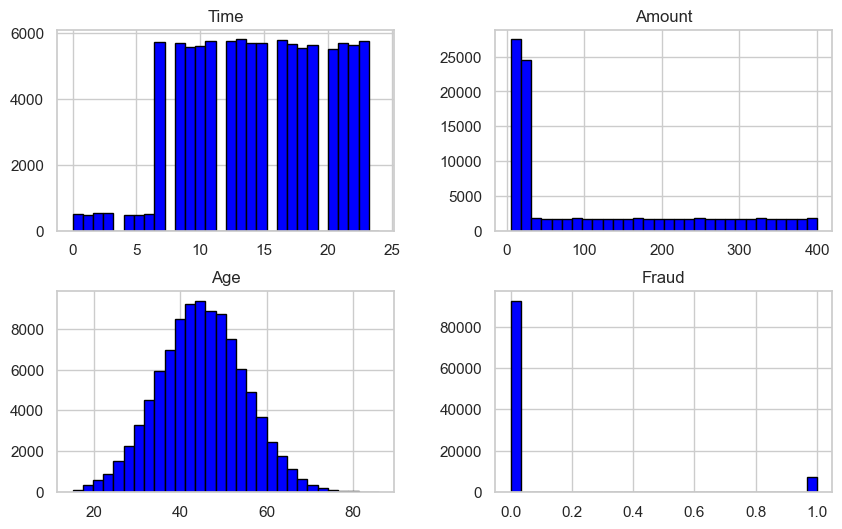

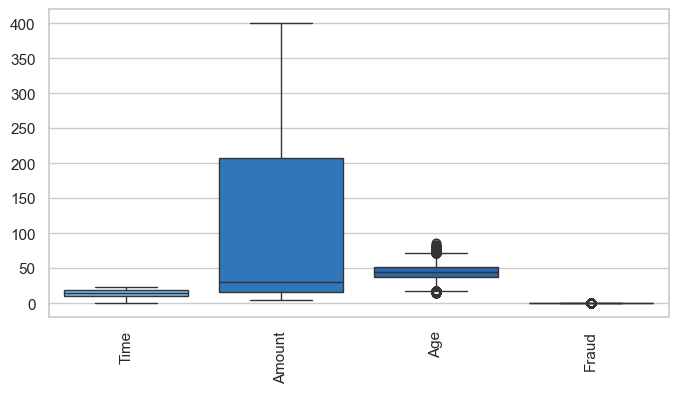

In [52]:
# Histogram for numerical data
df.hist(bins=30, figsize=(10, 6), color='blue', edgecolor='black')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()


In [53]:
# categorical_columns = df.select_dtypes(include=['object']).columns
# for col in categorical_columns:
#     plt.figure(figsize=(8, 4))
#     sns.countplot(x=col, data=df, color='steelblue')  # Use a single consistent color
#     plt.title(f"Count of {col}")
#     plt.xticks(rotation=90)
#     plt.show()


Correlation Matrix

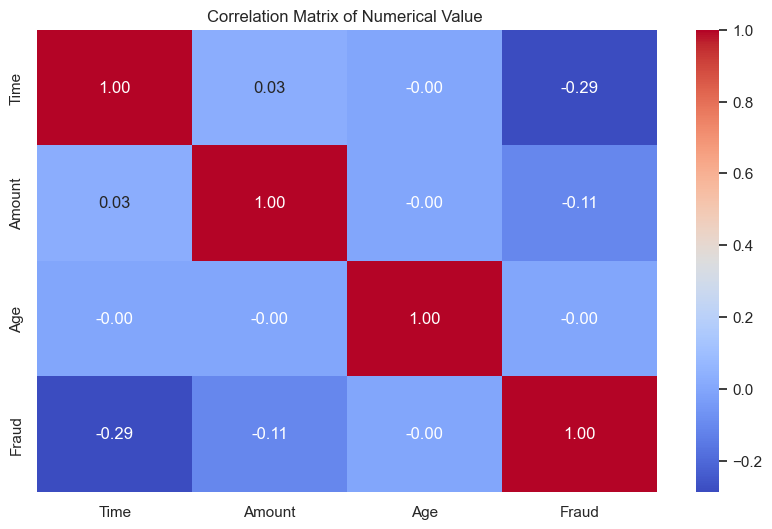

In [54]:
plt.figure(figsize=(10, 6))

# Select only numerical columns for correlation
numerical_columns = df.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Value ")
plt.show()

In [55]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [56]:
# # Boxplot for numerical vs categorical data
# for col in categorical_columns:
#     for num_col in df.select_dtypes(include=np.number).columns:
#         plt.figure(figsize=(10, 6))
#         sns.boxplot(x=col, y=num_col, data=df)
#         plt.title(f"{num_col} vs {col}")
#         plt.xticks(rotation=90)
#         plt.show()

Outliers - Amount has a huge outlier variance along with Age,time.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99983 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          99983 non-null  object 
 1   Date                    99983 non-null  object 
 2   Day of Week             99983 non-null  object 
 3   Time                    99983 non-null  int64  
 4   Type of Card            99983 non-null  object 
 5   Entry Mode              99983 non-null  object 
 6   Amount                  99983 non-null  float64
 7   Type of Transaction     99983 non-null  object 
 8   Merchant Group          99983 non-null  object 
 9   Country of Transaction  99983 non-null  object 
 10  Shipping Address        99983 non-null  object 
 11  Country of Residence    99983 non-null  object 
 12  Gender                  99983 non-null  object 
 13  Age                     99983 non-null  float64
 14  Bank                    99983 non-null  obj

In [57]:
print(df['Fraud'].value_counts())

Fraud
0    92788
1     7195
Name: count, dtype: int64


In [58]:
df.shape

(99983, 16)

In [59]:
# Identify outliers using boxplots
# numerical_columns = df.select_dtypes(include=np.number).columns
# for col in numerical_columns:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x=df[col])
#     plt.title(f"Boxplot of {col}")
#     plt.show()


In [ ]:
def outliers(df, exclude_columns=None):
    # Identify numerical columns, excluding the specified columns
    numerical_columns = df.select_dtypes(include=['number']).columns
    if exclude_columns:
        numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
    
    df_cleaned = df.copy()
    
    for column in numerical_columns:
        Q1 = df_cleaned[column].quantile(0.25)  # First quartile
        Q3 = df_cleaned[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before_count = len(df_cleaned)
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
        after_count = len(df_cleaned)
        
        print(f"Column: {column} | Rows removed: {before_count - after_count}")

    return df_cleaned


In [61]:
df_cleaned = outliers(df, exclude_columns=['Fraud'])


Column: Time | Rows removed: 0
Column: Amount | Rows removed: 0
Column: Age | Rows removed: 509


In [62]:
print(df_cleaned['Fraud'].value_counts())

Fraud
0    92317
1     7157
Name: count, dtype: int64


In [63]:
df_cleaned.describe

<bound method NDFrame.describe of       Transaction ID       Date Day of Week  Time Type of Card Entry Mode  \
0          #3577 209  14-Oct-20   Wednesday    19         Visa        Tap   
1          #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   
2          #2694 780  14-Oct-20   Wednesday    14         Visa        Tap   
3          #2640 960  13-Oct-20     Tuesday    14         Visa        Tap   
4          #2771 031  13-Oct-20     Tuesday    23         Visa        CVC   
...              ...        ...         ...   ...          ...        ...   
99995      #3203 892  13-Oct-20     Tuesday    22   MasterCard        Tap   
99996      #3304 849  14-Oct-20   Wednesday    23   MasterCard        PIN   
99997      #3532 129  13-Oct-20     Tuesday    11   MasterCard        PIN   
99998      #3107 092  14-Oct-20   Wednesday    22         Visa        Tap   
99999      #3400 711  14-Oct-20   Wednesday    16         Visa        PIN   

       Amount Type of Transaction Merchan

In [64]:
numerical_columns

,Time,Amount,Age,Fraud
0,19,5.0,25.2,0
1,17,288.0,49.6,0
2,14,5.0,42.2,0
3,14,28.0,51.0,0
4,23,91.0,38.0,1
...,...,...,...,...
99995,22,15.0,53.8,0
99996,23,7.0,45.0,0
99997,11,21.0,46.5,0
99998,22,25.0,48.2,0


### Edited

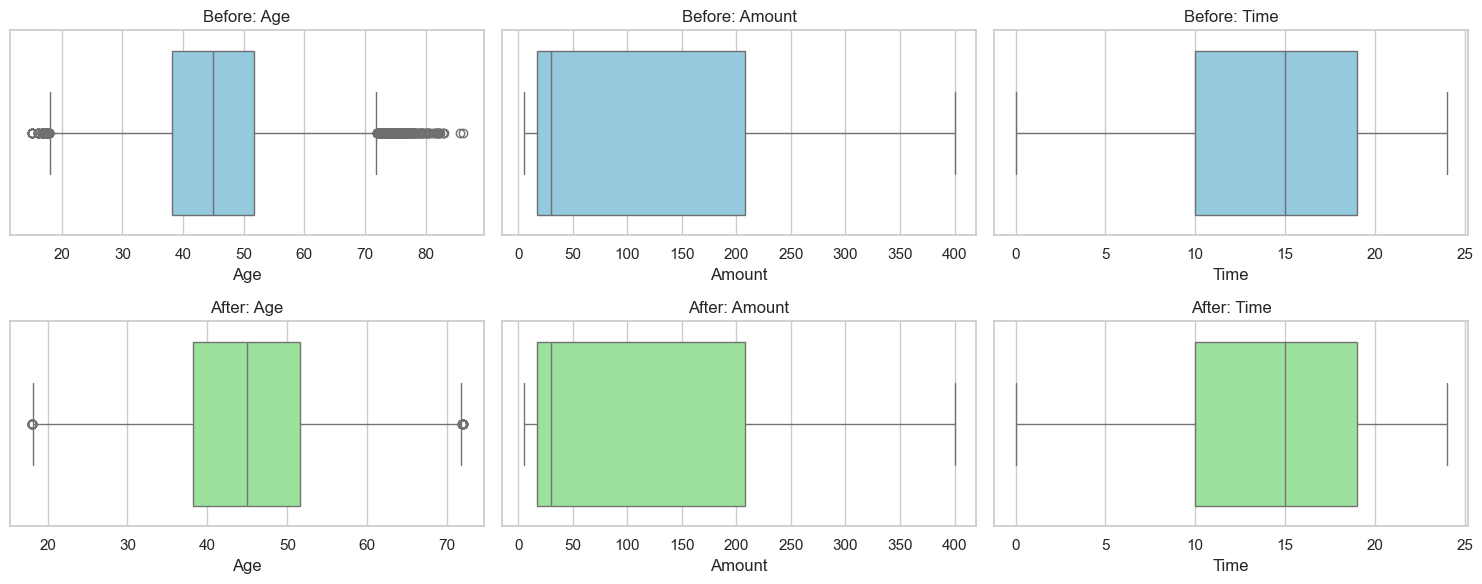

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Identify numerical columns excluding 'Fraud'
numerical_columns = df.select_dtypes(include=['number']).columns.difference(['Fraud'])

# Number of plots per row
plots_per_row = 3
total_columns = len(numerical_columns)

# Calculate number of rows needed for the boxplots
rows = (total_columns + plots_per_row - 1) // plots_per_row

# Prepare subplots
fig, axes = plt.subplots(nrows=2 * rows, ncols=plots_per_row, figsize=(5 * plots_per_row, 6 * rows))
axes = axes.flatten()  # Flatten axes for easier iteration

# Plot "before" boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Before: {column}")

# Leave blank if there are fewer plots than axes
for j in range(i + 1, plots_per_row * rows):
    fig.delaxes(axes[j])

# Plot "after" boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_cleaned[column], ax=axes[i + plots_per_row * rows], color="lightgreen")
    axes[i + plots_per_row * rows].set_title(f"After: {column}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


### Pre-Processing

In [66]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Select categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in categorical_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Show the dataset after label encoding
print(df_cleaned.head())


   Transaction ID  Date  Day of Week  Time  Type of Card  Entry Mode  Amount  \
0           85957     1            3    19             1           2     5.0   
1           41023     1            3    17             0           1   288.0   
2           12454     1            3    14             1           2     5.0   
3            7888     0            2    14             1           2    28.0   
4           18813     0            2    23             1           0    91.0   

   Type of Transaction  Merchant Group  Country of Transaction  \
0                    2               2                       4   
1                    2               8                       3   
2                    2               7                       1   
3                    2               2                       4   
4                    1               1                       3   

   Shipping Address  Country of Residence  Gender   Age  Bank  Fraud  
0                 4                     4       1  

In [67]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99474 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          99474 non-null  int32  
 1   Date                    99474 non-null  int32  
 2   Day of Week             99474 non-null  int32  
 3   Time                    99474 non-null  int64  
 4   Type of Card            99474 non-null  int32  
 5   Entry Mode              99474 non-null  int32  
 6   Amount                  99474 non-null  float64
 7   Type of Transaction     99474 non-null  int32  
 8   Merchant Group          99474 non-null  int32  
 9   Country of Transaction  99474 non-null  int32  
 10  Shipping Address        99474 non-null  int32  
 11  Country of Residence    99474 non-null  int32  
 12  Gender                  99474 non-null  int32  
 13  Age                     99474 non-null  float64
 14  Bank                    99474 non-null  int

#### Splitting Data into Features and Target

In [68]:
from sklearn.preprocessing import RobustScaler
x = df_cleaned.drop('Fraud',axis=1).to_numpy()
y = df_cleaned['Fraud'].to_numpy()

# Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=100)


# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = RobustScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

# Define target class names 
target_names = ['Valid', 'Fraud']

#### Model Implementation
Multiple models are implemented to predict loan approval status. These include:
- Random Forest
- Support Vector Machines (SVM)
- Naive Bayes
- Gradient Boosting  
- K-Nearest Neighbors (KNN)

##### Each model is trained on the dataset, and its performance is evaluated using accuracy, precision, recall, and F1-score.

Random Forest

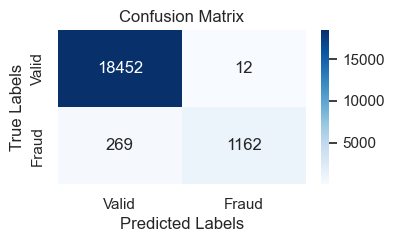


:: Classification Report ::
              precision    recall  f1-score   support

       Valid       0.99      1.00      0.99     18464
       Fraud       0.99      0.81      0.89      1431

    accuracy                           0.99     19895
   macro avg       0.99      0.91      0.94     19895
weighted avg       0.99      0.99      0.99     19895


Accuracy Score:

:: Accuracy :: 0.9859


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Trees grow until fully expanded
    random_state=42,   # For reproducibility
    class_weight='balanced'  # Handles class imbalance
)

# Train the Random Forest Classifier
rf_classifier.fit(x_train2, y_train)

# Make predictions
y_pred = rf_classifier.predict(x_test2)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print("\n:: Classification Report ::")
print(classification_report(y_test, y_pred, target_names=target_names))
accuracy_score = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:")
print(f"\n:: Accuracy :: {accuracy_score:.4f}")



SVM

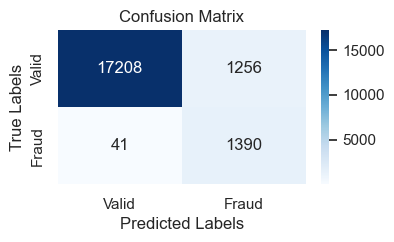


Classification Report:
              precision    recall  f1-score   support

       Valid       1.00      0.93      0.96     18464
       Fraud       0.53      0.97      0.68      1431

    accuracy                           0.93     19895
   macro avg       0.76      0.95      0.82     19895
weighted avg       0.96      0.93      0.94     19895


Accuracy Score:

:: Accuracy :: 0.9348


In [70]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the SVM Classifier
svm_classifier = SVC(
    kernel='rbf',         # Radial Basis Function kernel
    class_weight='balanced',  # Handle class imbalance
    probability=True,     # Enable probability estimates
    random_state=42
)


# Train the SVM Classifier
svm_classifier.fit(x_train2, y_train)

# Make predictions
y_pred = svm_classifier.predict(x_test2)

# Evaluate the Model
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
accuracy_score = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:")
print(f"\n:: Accuracy :: {accuracy_score:.4f}")




XGBoost

c:\Users\cmanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


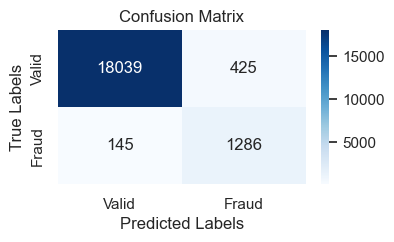


Classification Report:
              precision    recall  f1-score   support

       Valid       0.99      0.98      0.98     18464
       Fraud       0.75      0.90      0.82      1431

    accuracy                           0.97     19895
   macro avg       0.87      0.94      0.90     19895
weighted avg       0.97      0.97      0.97     19895


Accuracy Score:

:: Accuracy :: 0.9713


In [71]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',       # Evaluation metric
    use_label_encoder=False,     # Suppress warnings about label encoding
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Handle class imbalance
    random_state=42              # For reproducibility
)

# Train the model
xgb_classifier.fit(x_train2, y_train)

# Make predictions
y_pred = xgb_classifier.predict(x_test2)
# Directly predict probabilities in XGBoost
y_pred_prob_xgb = xgb_classifier.predict(x_test2)  # Returns probabilities if classifier is configured for binary classification

# Evaluate the Model
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
accuracy_score = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:")
print(f"\n:: Accuracy :: {accuracy_score:.4f}")

Naive Bayes

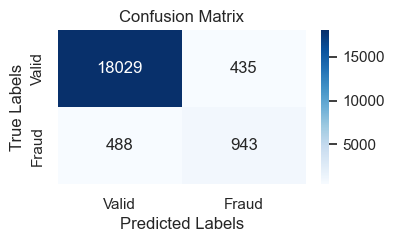


Classification Report:
              precision    recall  f1-score   support

       Valid       0.97      0.98      0.98     18464
       Fraud       0.68      0.66      0.67      1431

    accuracy                           0.95     19895
   macro avg       0.83      0.82      0.82     19895
weighted avg       0.95      0.95      0.95     19895


Accuracy Score:

:: Accuracy :: 0.9536


In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Naive Bayes Classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes Classifier
nb_classifier.fit(x_train2, y_train)

# Make predictions
y_pred = nb_classifier.predict(x_test2)

# Evaluate the Model
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
accuracy_score = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:")
print(f"\n:: Accuracy :: {accuracy_score:.4f}")

Neural Networks

Epoch 1/20


c:\Users\cmanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2487/2487 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9441 - loss: 0.1632 - val_accuracy: 0.9685 - val_loss: 0.0776
Epoch 2/20
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9671 - loss: 0.0824 - val_accuracy: 0.9736 - val_loss: 0.0661
Epoch 3/20
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9740 - loss: 0.0680 - val_accuracy: 0.9762 - val_loss: 0.0607
Epoch 4/20
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9750 - loss: 0.0646 - val_accuracy: 0.9789 - val_loss: 0.0558
Epoch 5/20
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0613 - val_accuracy: 0.9801 - val_loss: 0.0535
Epoch 6/20
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9786 - loss: 0.0571 - val_accuracy: 0.9788 - val_loss: 0.0550
Epoch 7/20
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9794 - loss: 0.0574 - val_accuracy: 0.9813 - val_loss: 0.0512
Epoch 8/20
2487/2487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0547 - val_accurac

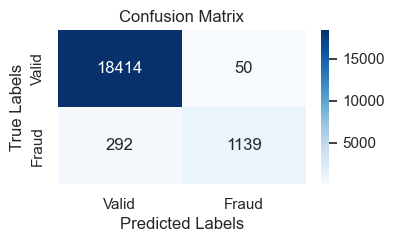


Classification Report:
              precision    recall  f1-score   support

       Valid       0.98      1.00      0.99     18464
       Fraud       0.96      0.80      0.87      1431

    accuracy                           0.98     19895
   macro avg       0.97      0.90      0.93     19895
weighted avg       0.98      0.98      0.98     19895


Accuracy Score:

:: Accuracy :: 0.9828


In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Neural Network model
model = Sequential([
    Dense(64, input_dim=x_train2.shape[1], activation='relu'),  # First hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train2, y_train,
    validation_data=(x_test2, y_test),
    epochs=20,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1  # Display training progress
)

# Evaluate the model on the test data
y_pred = (model.predict(x_test2) > 0.5).astype("int32")  # Convert probabilities to binary predictions
# Evaluate the Model
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
accuracy_score = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:")
print(f"\n:: Accuracy :: {accuracy_score:.4f}")

#### Comparison of Models

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Dictionary of trained models with their actual variable names
models = {
    'Random Forest': rf_classifier,
    'Neural Network': model, 
    'SVM': svm_classifier,
    'Naive Bayes': nb_classifier,
    'XGBoost': xgb_classifier  
}

# Dictionary to store metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "AUC": []
}

622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


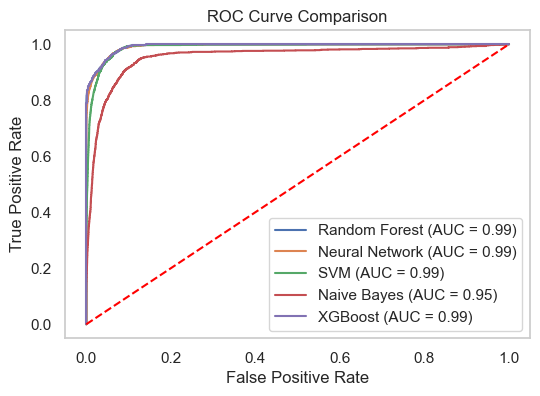

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Ensure all models are initialized and trained with probability estimation enabled (if applicable)
models = {
    'Random Forest': rf_classifier,        # Random Forest Classifier
    'Neural Network': model,               # Neural Network
    'SVM': svm_classifier,                 # SVM with probability=True
    'Naive Bayes': nb_classifier,          # Naive Bayes
    'XGBoost': xgb_classifier              # XGBoost Classifier
}

# Dictionary to store evaluation metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "AUC": []
}

# Initialize ROC plot
plt.figure(figsize=(6, 4))

# Loop through models to compute metrics and plot ROC curve
for name, clf in models.items():
    # Get prediction probabilities
    if name == 'Neural Network':
        y_pred_prob = clf.predict(x_test2).ravel()  # Neural Network outputs probabilities directly
    elif hasattr(clf, "predict_proba"):
        y_pred_prob = clf.predict_proba(x_test2)[:, 1]  # Get probabilities for the positive class
    else:
        raise ValueError(f"{name} does not support predict_proba. Ensure it is configured correctly.")

    # Get binary predictions
    y_pred = (y_pred_prob > 0.5).astype("int32") if name == 'Neural Network' else clf.predict(x_test2)

    # Calculate evaluation metrics
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1-Score"].append(f1_score(y_test, y_pred))
    metrics["AUC"].append(roc_auc_score(y_test, y_pred_prob))

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {metrics['AUC'][-1]:.2f})")

# Finalize ROC Curve plot
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


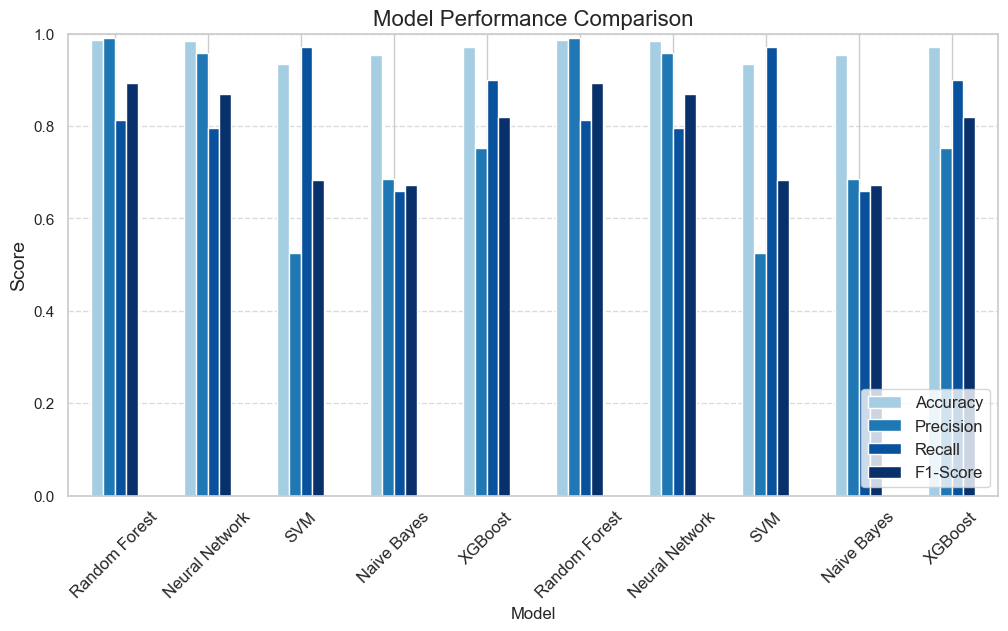

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Calculate evaluation metrics for all models
for name, clf in models.items():
    # Get prediction probabilities
    if name == 'Neural Network':
        y_pred_prob = clf.predict(x_test2).ravel()  # Neural Network outputs probabilities directly
    elif hasattr(clf, "predict_proba"):
        y_pred_prob = clf.predict_proba(x_test2)[:, 1]  # Get probabilities for the positive class
    else:
        raise ValueError(f"{name} does not support predict_proba. Ensure it is configured correctly.")

    # Get binary predictions
    y_pred = (y_pred_prob > 0.5).astype("int32") if name == 'Neural Network' else clf.predict(x_test2)

    # Calculate metrics
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1-Score"].append(f1_score(y_test, y_pred))
    metrics["AUC"].append(roc_auc_score(y_test, y_pred_prob))

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Visualization: Bar graph for Accuracy, Precision, Recall, and F1-Score
colors = ["#a6cee3", "#1f78b4", "#08519c", "#08306b"]  # Shades of blue for metrics

plt.figure(figsize=(12, 6))
metrics_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind="bar", color=colors, ax=plt.gca()
)

# Add titles and labels
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.ylim(0, 1)  # Ensure all metrics are on the same scale
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for readability
plt.legend(loc="lower right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

